In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("ILPD.csv")
df

,Age,Gender,TB,DB,AP,SGPT,SGOT,TP,ALB,A/G,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# Encoding Gender column

In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder_x = LabelEncoder()
df['Gender'] = label_encoder_x.fit_transform(df[['Gender']])
df

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,Age,Gender,TB,DB,AP,SGPT,SGOT,TP,ALB,A/G,Target
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# Checking for NULL values

In [5]:
df.isnull().values.any()

True

In [6]:
df.isnull().sum().sum()

4

In [7]:
df[df.isnull().any(axis=1)]

,Age,Gender,TB,DB,AP,SGPT,SGOT,TP,ALB,A/G,Target
209,45,0,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,1,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,0,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,1,1.3,0.6,106,25,54,8.5,4.8,NaN,2


# Handling missing data
## 1. Replacing missing data with the mean value

In [8]:
from sklearn.impute import SimpleImputer

df1 = df.copy()
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')

# Fitting the data to the imputer object
imputer = imputer.fit(df1[['A/G']])  

# Imputing the data   
df1['A/G'] = imputer.transform(df1[['A/G']])  

In [9]:
df1.isnull().any()

Age       False
Gender    False
TB        False
DB        False
AP        False
SGPT      False
SGOT      False
TP        False
ALB       False
A/G       False
Target    False
dtype: bool

In [10]:
df1.iloc[[209,241,253,312],:]

,Age,Gender,TB,DB,AP,SGPT,SGOT,TP,ALB,A/G,Target
209,45,0,0.9,0.3,189,23,33,6.6,3.9,0.947064,1
241,51,1,0.8,0.2,230,24,46,6.5,3.1,0.947064,1
253,35,0,0.6,0.2,180,12,15,5.2,2.7,0.947064,2
312,27,1,1.3,0.6,106,25,54,8.5,4.8,0.947064,2


## 2. Handling Missing data by MultiVariate Imputation

In [14]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df2 = df.copy()

In [15]:
cont_feats = [col for col in df2.columns if df2[col].dtype != object]

In [16]:
iter_imputer = IterativeImputer(random_state=42)
iter_imputed = iter_imputer.fit_transform(df2[cont_feats])
df2 = pd.DataFrame(iter_imputed, columns=cont_feats)

In [18]:
df2['A/G'] = np.round(df2[['A/G']],2)

In [19]:
df2.iloc[[209,241,253,312],:]

,Age,Gender,TB,DB,AP,SGPT,SGOT,TP,ALB,A/G,Target
209,45.0,0.0,0.9,0.3,189.0,23.0,33.0,6.6,3.9,1.31,1.0
241,51.0,1.0,0.8,0.2,230.0,24.0,46.0,6.5,3.1,0.92,1.0
253,35.0,0.0,0.6,0.2,180.0,12.0,15.0,5.2,2.7,0.99,2.0
312,27.0,1.0,1.3,0.6,106.0,25.0,54.0,8.5,4.8,1.37,2.0


In [57]:
X = df2.iloc[:,:-1]
y = df2.iloc[:,-1]

# Feature Scaling

### 1. Standarization

In [58]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)
scaled_X = scaler.transform(X)
scaled_X

array([[ 1.25209764, -1.76228085, -0.41887783, ...,  0.29211961,
         0.19896867, -0.15181882],
       [ 1.06663704,  0.56744644,  1.22517135, ...,  0.93756634,
         0.07315659, -0.65329402],
       [ 1.06663704,  0.56744644,  0.6449187 , ...,  0.47653296,
         0.19896867, -0.18316102],
       ...,
       [ 0.44843504,  0.56744644, -0.4027597 , ..., -0.0767071 ,
         0.07315659,  0.16160318],
       [-0.84978917,  0.56744644, -0.32216906, ...,  0.29211961,
         0.32478075,  0.16160318],
       [-0.41704777,  0.56744644, -0.37052344, ...,  0.75315299,
         1.58290153,  1.72871318]])

### 2. Min-Max Scaling

In [59]:
min_max_scaler = preprocessing.MinMaxScaler()
minmax_X = min_max_scaler.fit_transform(X)
minmax_X

array([[0.70930233, 0.        , 0.00402145, ..., 0.5942029 , 0.52173913,
        0.24      ],
       [0.6744186 , 1.        , 0.14075067, ..., 0.69565217, 0.5       ,
        0.176     ],
       [0.6744186 , 1.        , 0.0924933 , ..., 0.62318841, 0.52173913,
        0.236     ],
       ...,
       [0.55813953, 1.        , 0.00536193, ..., 0.53623188, 0.5       ,
        0.28      ],
       [0.31395349, 1.        , 0.01206434, ..., 0.5942029 , 0.54347826,
        0.28      ],
       [0.39534884, 1.        , 0.0080429 , ..., 0.66666667, 0.76086957,
        0.48      ]])

### 3. Max Scaling

In [60]:
max_abs_scaler = preprocessing.MaxAbsScaler()
maxabs_X = max_abs_scaler.fit_transform(X)
maxabs_X

array([[0.72222222, 0.        , 0.00933333, ..., 0.70833333, 0.6       ,
        0.32142857],
       [0.68888889, 1.        , 0.14533333, ..., 0.78125   , 0.58181818,
        0.26428571],
       [0.68888889, 1.        , 0.09733333, ..., 0.72916667, 0.6       ,
        0.31785714],
       ...,
       [0.57777778, 1.        , 0.01066667, ..., 0.66666667, 0.58181818,
        0.35714286],
       [0.34444444, 1.        , 0.01733333, ..., 0.70833333, 0.61818182,
        0.35714286],
       [0.42222222, 1.        , 0.01333333, ..., 0.76041667, 0.8       ,
        0.53571429]])

### 4. Normalization
### 5. Robust Scaling

# Feature Selection

### 1. Univariate Selection

In [71]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

chi_selector = SelectKBest(chi2, k='all')
fit = chi_selector.fit(minmax_X, y)
scores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, scores], axis=1)
featureScores.columns = ['Specs', 'Scores']
print(featureScores.nlargest(10,'Scores'))

    Specs     Scores
3      DB  10.229450
2      TB   5.032071
5    SGPT   3.683457
4      AP   2.519888
6    SGOT   2.281881
9     A/G   0.993096
1  Gender   0.964518
8     ALB   0.930252
0     Age   0.821266
7      TP   0.032194


### 2. Feature Importance

Age :  0.12069224323480834
Gender :  0.02363527428349839
TB :  0.111065141196079
DB :  0.10368605906524404
AP :  0.11681926699783102
SGPT :  0.11407190925401263
SGOT :  0.11650736244838528
TP :  0.09412315034062109
ALB :  0.10126024620703863
A/G :  0.09813934697248154


<BarContainer object of 10 artists>

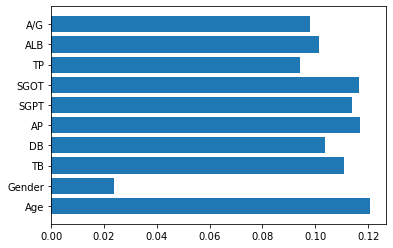

In [94]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(minmax_X,y)
for (cols,scores) in zip(X.columns, model.feature_importances_):
    print(cols,": ",scores)
plt.barh(X.columns, model.feature_importances_)

<BarContainer object of 10 artists>

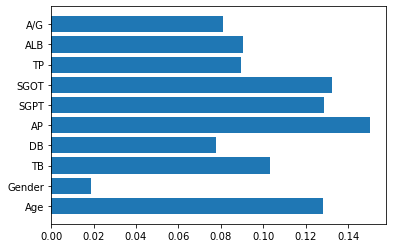

In [102]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(minmax_X, y)
plt.barh(X.columns, rf.feature_importances_)

Age :  20
Gender :  0
TB :  151
DB :  48
AP :  115
SGPT :  17
SGOT :  91
TP :  0
ALB :  43
A/G :  15


<BarContainer object of 10 artists>

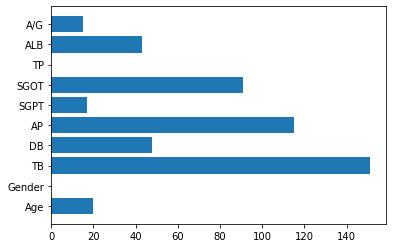

In [101]:
# !pip install lightgbm
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SelectFromModel
lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.0001,
                    num_leaves=32, colsample_bytree=0.2,                                           
                    reg_alpha=3, reg_lambda=1, min_split_gain=0.01,    
                    min_child_weight=40)
lgbc.fit(minmax_X, y)
for (cols,scores) in zip(X.columns, lgbc.feature_importances_):
    print(cols,": ",scores)
plt.barh(X.columns, lgbc.feature_importances_)

### 3. Correlation matrix

<AxesSubplot:>

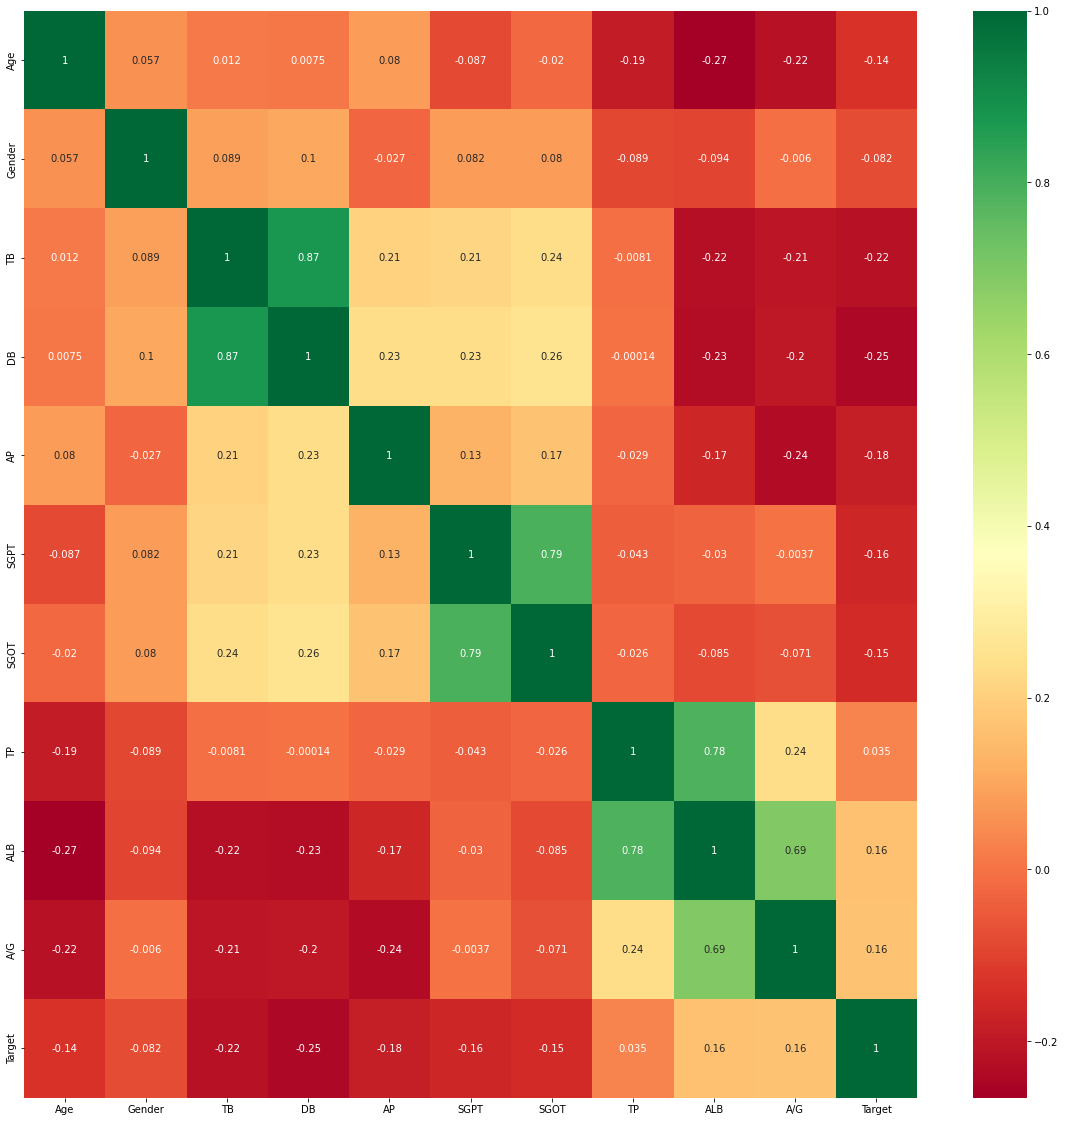

In [84]:
import seaborn as sns

corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(df2[top_corr_features].corr(),annot=True,cmap='RdYlGn')

### 4. Anova F-value

In [87]:
from sklearn.feature_selection import f_classif

anov_selector = SelectKBest(f_classif, k='all')
fit = anov_selector.fit(minmax_X, y)
scores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, scores], axis=1)
featureScores.columns = ['Specs', 'Scores']
print(featureScores.nlargest(10,'Scores'))

    Specs     Scores
3      DB  37.439592
2      TB  29.609282
4      AP  20.558435
9     A/G  16.199825
5    SGPT  15.941220
8     ALB  15.537431
6    SGOT  13.728635
0     Age  11.171429
1  Gender   3.973363
7      TP   0.712934


In [79]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    minmax_X, y, test_size=0.20, random_state=7)

# fit model no training data
model = ExtraTreesClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.65%
